In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD
E_, x_, y_ = -10..10, -10..10, -10..10
box = IntervalBox(E_, x_, y_)
using CairoMakie
using GLMakie

  Activating project at `D:\Science\Code\Julia\envr`


In [2]:
function Res(u, p, t)
    du1 = -u[2]-u[3]
    du2 = u[1]+p[1]*u[2]
    du3 = p[2]*u[1]-p[3]*u[3]+u[1]*u[3]
    return SA[du1, du2, du3]
end;

In [3]:
t = 50000.0; tstep = 0.001; Tt = 1000.0
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const b = 0.3; const c = 4.9
a = 0.35;

In [5]:
u0 = SA[0.1, 0.3, 0.5]
p = SA[a, b, c]
ds = ContinuousDynamicalSystem(Res, u0, p)

3-dimensional continuous dynamical system
 state:       [0.1, 0.3, 0.5]
 rule f:      Res
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.35, 0.3, 4.9]

In [6]:
tr = trajectory(ds, t, Δt = tstep; Ttr = Tt, diffeq = integ_set)
trange = range(0.0, t, step = tstep)
fp, eigs, stable = fixedpoints(ds, box, tol = 1e-20);

In [7]:
function d(p1, p2)
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    dist = sqrt( (x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2 )
    return dist
end

d (generic function with 1 method)

In [8]:
distance = zeros(length(tr))
for i in range(1, length(distance), step = 1)
    distance[i] = d(tr[i], fp[1])
end

In [9]:
minimum(distance)

0.009383613930464399

In [10]:
println(fp[1])
for eig in eigs[1]
    println(eig)
end

sf = fp[1];
saddle = 0
saddle_index = fp[1][2] / fp[1][1]
for eig in eigs[1]
    Re = real(eig)
    saddle+=Re
end
println()
println("Седловая величина:", saddle)
println("Седловой индекс:", saddle_index)

[4.3659453288695125e-36, -4.892570691863299e-35, 4.089483332796827e-37]
-4.840394086698119 + 0.0im
0.14519704334905895 - 0.9846520393866871im
0.14519704334905895 + 0.9846520393866871im

Седловая величина:-4.550000000000001
Седловой индекс:-11.206211537995019


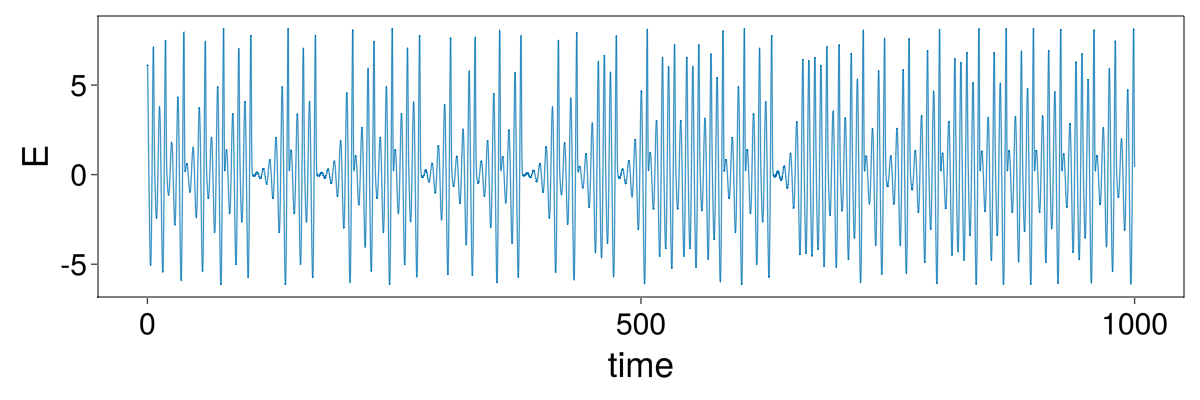

In [11]:
lb_size = 35; tck_size = 30;
ts, tf = 1, 1000000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 1.0)
f

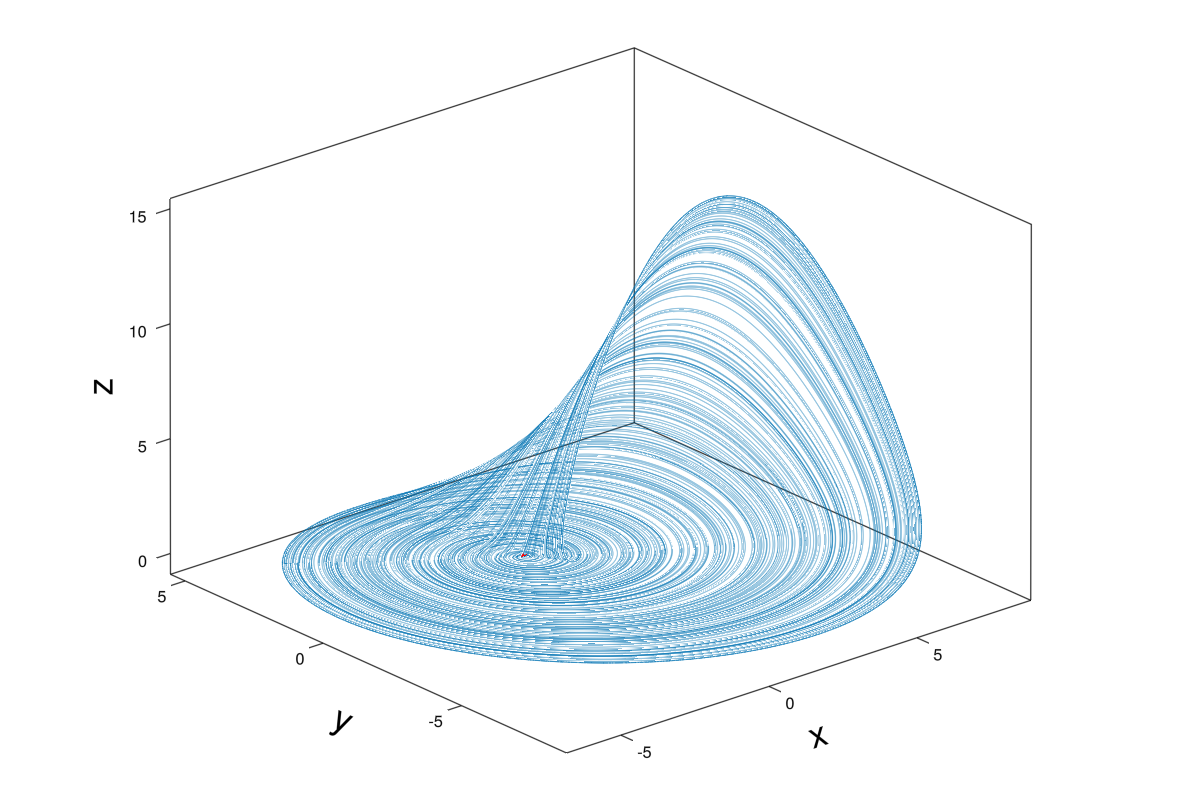

In [12]:
ts, tf = 1, 2000000
f = Figure(resolution = (1200, 800))

idx, idy, idz = 1, 2, 3

ax = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "z",
            xlabelsize = 35, ylabelsize = 35, zlabelsize = 35,
            xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz], linewidth = 0.5)

scatter!(fp[1][idx], fp[1][idy], fp[1][idz], markersize = 10, color = :red)

f

In [16]:
vectors = LinearAlgebra.eigvecs(Array(jacobian(ds, fp[1], p, 0)))

3×3 Matrix{ComplexF64}:
    0.19474+0.0im   0.708516-0.0im          0.708516+0.0im
 -0.0375193+0.0im  -0.143459+0.689721im    -0.143459-0.689721im
   0.980137+0.0im  0.0405843+0.00792068im  0.0405843-0.00792068im

In [24]:
integ_set_ = (alg = RK4(), adaptive = false, dt = -tstep);
eps = 1e-15
point = fp[1]+eps*real(vectors[1, :])

3-element SVector{3, Float64} with indices SOneTo(3):
 1.947398845179071e-16
 7.085159070414899e-16
 7.085159070414899e-16

In [26]:
tr1 = trajectory(ds, -t, Δt = -tstep; diffeq = integ_set_);

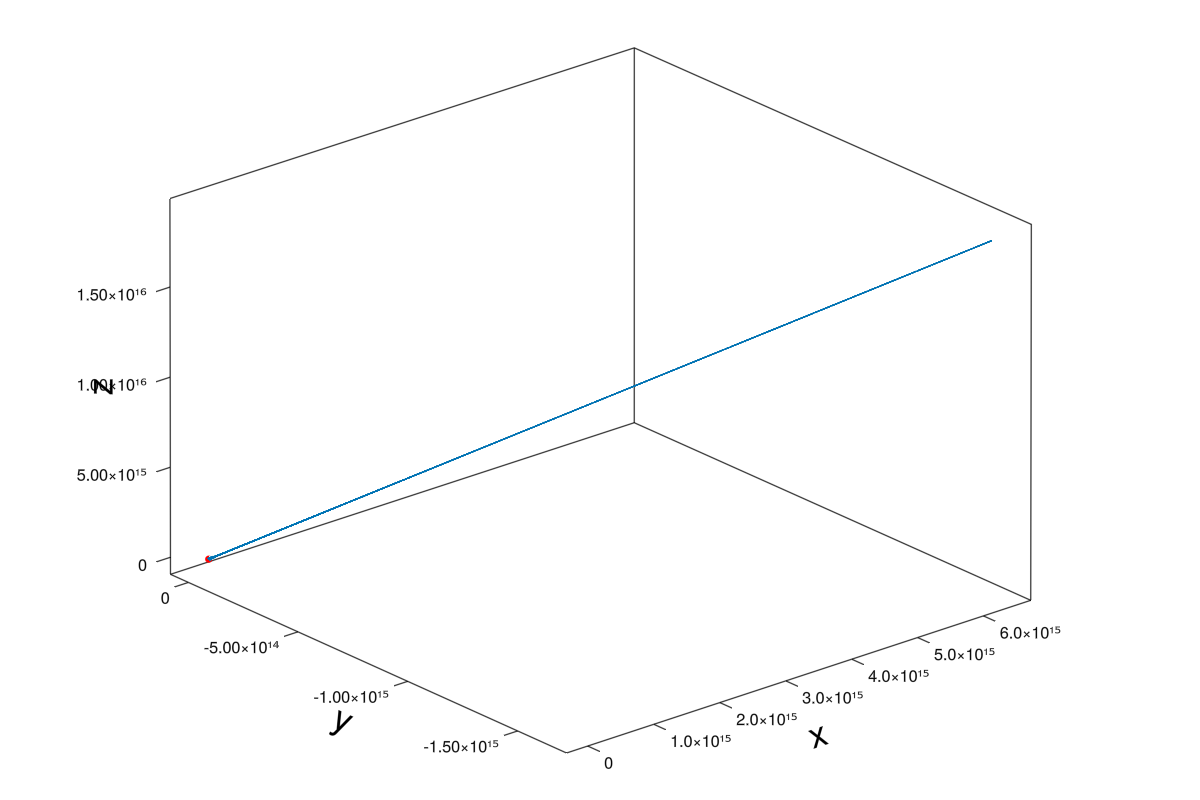

In [27]:
ts, tf = 1, 2000000
f = Figure(resolution = (1200, 800))

idx, idy, idz = 1, 2, 3

ax = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "z",
            xlabelsize = 35, ylabelsize = 35, zlabelsize = 35,
            xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz], linewidth = 0.5)

scatter!(fp[1][idx], fp[1][idy], fp[1][idz], markersize = 10, color = :red)

f